In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [3]:
import pickle
import pandas as pd
import data_processing as dp
#import pirna_kmer as pk
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import numpy as np
#import phy_net as pn
from keras.layers import Input
import keras.utils.np_utils as kutils
#import threading
import time
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Activation, Flatten
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.models import load_model
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.class_weight import compute_class_weight
from keras.layers import Convolution2D as Conv2D
from keras.layers import MaxPooling2D
from keras.callbacks import EarlyStopping
import json
#from sklearn.metrics import matthews_corrcoef
from keras.models import Model

import tensorflow as tf
import os
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score, matthews_corrcoef
from sklearn.metrics import precision_score, recall_score, f1_score
#from sklearn.metrics import accuracy_score, recall_score
remark = ''  # The mark written in the result file.
import time
import numpy as np
import pickle
import keras.layers.core as core
import keras.layers.convolutional as conv
import keras.models as models
from keras.models import Model
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, Callback, LearningRateScheduler, History
from keras.layers import Dense, Dropout, Activation, Flatten, Input
from keras.layers.normalization import BatchNormalization
from keras.regularizers import l1, l2, l1_l2
import keras.metrics
from keras.optimizers import Nadam, Adam
from sklearn.metrics import precision_recall_curve, roc_curve, auc, average_precision_score, matthews_corrcoef
import data_processing
import os
from sklearn import svm
from sklearn.manifold import TSNE
from sklearn.metrics import accuracy_score, recall_score


/home/smk5g5/.conda/envs/py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [4]:
def data():
    """
    Data providing function:

    This function is separated from create_model() so that hyperopt
    won't reload data for each evaluation run.
    """
    import numpy as np
    import pickle
    import pandas as pd
    from keras.layers import Input
    file1 = open("./hyperas_combined_model/trainx1", 'rb') #sec str one hot matrix
    trainX1 = pickle.load(file1)
    file1 = open("./hyperas_combined_model/trainx2", 'rb') #seq one hot matrix
    trainX2 = pickle.load(file1)
    file1 = open("./hyperas_combined_model/trainy", 'rb') #labels
    trainY1 = pickle.load(file1)
    file1 = open("./hyperas_combined_model/valx1", 'rb') 
    valX1 = pickle.load(file1)
    file1 = open("./hyperas_combined_model/valx2", 'rb') 
    valX2 = pickle.load(file1)
    file1 = open("./hyperas_combined_model/valy", 'rb') 
    valY1 = pickle.load(file1)
    testX1 = pickle.load(open("./hyperas_combined_model/testx1", 'rb'))
    testX2 = pickle.load(open("./hyperas_combined_model/testx2", 'rb'))
    testY = pickle.load(open("./hyperas_combined_model/testy", 'rb'))
    return trainX1, trainX2, trainY1, valX1,valX2, valY1,testX1,testX2,testY

In [5]:
trainX1, trainX2, trainY1, valX1,valX2, valY1,testX1,testX2,testY = data()

In [13]:
def trunc_MCNN(trainX1,trainX2,trainY1,valX1,valX2,valY1,input_1,input_2, i):
    onehot_secstr = conv.Conv1D(5, 10, kernel_initializer='glorot_normal',kernel_regularizer=l2(0.04), padding='valid', name='0_secstr')(input_1)
    onehot_secstr = Dropout(0.6)(onehot_secstr)
    onehot_secstr = keras.layers.advanced_activations.PReLU(alpha_initializer='zeros', alpha_regularizer=None,alpha_constraint=None, shared_axes=None)(onehot_secstr)
    onehot_secstr = core.Flatten()(onehot_secstr)
    onehot_secstr2 = conv.Conv1D(9, 4, kernel_initializer='glorot_normal',kernel_regularizer=l2(0.02), padding='valid', name='1_secstr')(input_1)
    onehot_secstr2 = Dropout(0.4)(onehot_secstr2)
    onehot_secstr2 = keras.layers.advanced_activations.PReLU(alpha_initializer='zeros', alpha_regularizer=None,alpha_constraint=None, shared_axes=None)(onehot_secstr2)
    onehot_secstr2 = core.Flatten()(onehot_secstr2)
    output_onehot_sec = concatenate([onehot_secstr, onehot_secstr2], axis=-1)
    onehot_x = conv.Conv1D(5, 10, kernel_initializer='glorot_normal',kernel_regularizer=l2(0.04), padding='valid', name='0')(input_2)
    onehot_x = Dropout(0.6)(onehot_x)
    onehot_x = keras.layers.advanced_activations.PReLU(alpha_initializer='zeros', alpha_regularizer=None,alpha_constraint=None, shared_axes=None)(onehot_x)
    onehot_x = core.Flatten()(onehot_x)
    onehot_x2 = conv.Conv1D(9, 4, kernel_initializer='glorot_normal',kernel_regularizer=l2(0.02), padding='valid', name='1')(input_2)
    onehot_x2 = Dropout(0.4)(onehot_x2)
    onehot_x2 = keras.layers.advanced_activations.PReLU(alpha_initializer='zeros', alpha_regularizer=None,alpha_constraint=None, shared_axes=None)(onehot_x2)
    onehot_x2 = core.Flatten()(onehot_x2)
    output_onehot_seq = concatenate([onehot_x, onehot_x2], axis=-1)
    final_output = concatenate([output_onehot_sec, output_onehot_seq],name='finale_layer')
    dense_out = Dense(128, kernel_initializer='glorot_normal', activation='softplus', name='dense_concat')(final_output)
    cnn = Model(inputs=[input_1,input_2], outputs=dense_out)
    cnn.summary()
    #early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')
    return cnn

In [14]:
import random
row1,col1 = trainX1[0].shape
input_1 = Input(shape=(row1,col1))
row2,col2 = trainX2[0].shape
input_2 = Input(shape=(row2,col2))
i = random.randint(1,100)

In [15]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

In [16]:
best_model = models.load_model("best_hyperas_model_secstr.h5")
best_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_53 (InputLayer)           (None, 51, 6)        0                                            
__________________________________________________________________________________________________
input_54 (InputLayer)           (None, 51, 4)        0                                            
__________________________________________________________________________________________________
0_secstr (Conv1D)               (None, 42, 5)        305         input_53[0][0]                   
__________________________________________________________________________________________________
1_secstr (Conv1D)               (None, 48, 9)        225         input_53[0][0]                   
__________________________________________________________________________________________________
0 (Conv1D)

In [17]:
trunc_cnn = trunc_MCNN(trainX1,trainX2,trainY1,valX1,valX2,valY1,input_1,input_2, i)
for i, layer in enumerate(trunc_cnn.layers):
    trunc_cnn.layers[i].set_weights(best_model.layers[i].get_weights())
nadam = Nadam(lr=0.001)
trunc_cnn.compile(loss='binary_crossentropy', optimizer=nadam, metrics=[keras.metrics.binary_accuracy])  # Nadam
trunc_cnn.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 51, 6)        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 51, 4)        0                                            
__________________________________________________________________________________________________
0_secstr (Conv1D)               (None, 42, 5)        305         input_3[0][0]                    
__________________________________________________________________________________________________
1_secstr (Conv1D)               (None, 48, 9)        225         input_3[0][0]                    
__________________________________________________________________________________________________
0 (Conv1D)

In [18]:
def read_composite_data(file):
    df = pd.read_csv(file,sep="\s+",names=["Sequence","Secondary_str","Chr_loc","Label"])
    return(df)
def subselect_list(indices,mylist):
    final = [mylist[i] for i in indices]
    return  final
def get_all_seq(df):
    seq = []
    secstr = []
    label = []
    for indexs in df.index:
        seq.append(df.loc[indexs].values[0])
        secstr.append(df.loc[indexs].values[1])
        label.append(df.loc[indexs].values[3])
    return seq,secstr,label

test = read_composite_data("./Psu_test_combined.txt")
seq_test,secstr,label_test = get_all_seq(test)
print(label_test[1:10])

[0, 0, 1, 0, 0, 0, 0, 0, 0]


In [19]:
def random_subselection(random_indices,seq_list):
    random_seq = []
    for i in random_indices:
        random_seq.append(seq_list[i])
    return random_seq

In [20]:
tag = np.array(label_test)

In [21]:
def onehotkey_sec(seq, tag):
     """
     one hot coding
     :param seq:
     :param tag:
     :return:
     """
#     for num in range(len(seq)):
#         seq[num] = seq[num].strip('\n')
     letterDict = {}
     letterDict["H"] = 0
     letterDict["F"] = 1
     letterDict["M"] = 2
     letterDict["S"] = 3
     letterDict["T"] = 4
     letterDict["I"] = 5
     CategoryLen = 6
     probMatr = np.zeros((len(seq),len(seq[0]), CategoryLen))
     sampleNo = 0
     for sequence in seq:
         RNANo = 0
         for RNA in sequence:
             try:
                 index = letterDict[RNA]
                 probMatr[sampleNo][RNANo][index] = 1
                 RNANo += 1
             except:
                 RNANo += 1
         sampleNo += 1
     return probMatr, tag

def onehotkey(seq, tag):
     """
     one hot coding
     :param seq:
     :param tag:
     :return:
     """
#     for num in range(len(seq)):
#         seq[num] = seq[num].strip('\n')
     letterDict = {}
     letterDict["A"] = 0
     letterDict["C"] = 1
     letterDict["G"] = 2
     letterDict["U"] = 3
     letterDict["T"] = 3
     CategoryLen = 4
     probMatr = np.zeros((len(seq),len(seq[0]), CategoryLen))
     sampleNo = 0
     for sequence in seq:
         RNANo = 0
         for RNA in sequence:
             try:
                 index = letterDict[RNA]
                 probMatr[sampleNo][RNANo][index] = 1
                 RNANo += 1
             except:
                 RNANo += 1
         sampleNo += 1
     return probMatr, tag

In [35]:
tag = np.array(label_test)
pos_seq = subselect_list(np.where(tag==1)[0],seq_test)
pos_sec = subselect_list(np.where(tag==1)[0],secstr)
neg_seq = subselect_list(np.where(tag==0)[0],seq_test)
neg_sec = subselect_list(np.where(tag==0)[0],secstr)
print(len(pos_seq),len(pos_sec),len(neg_seq),len(neg_sec))
indices = len(neg_seq)-1
indices_list = []
for i in range(0,indices):
    indices_list.append(i)
import random
random.seed(int(time.time()))
testdat = random.sample(indices_list,len(pos_sec))
rand_seq = random_subselection(testdat,neg_seq)
rand_sec = random_subselection(testdat,neg_sec)
seqx1 = pos_seq+rand_seq
seqx2 = pos_sec+rand_sec
pos_tag = [1]*int(len(pos_seq))
neg_tag = [0]*int(len(neg_seq))
merged_labels = pos_tag+neg_tag
index_list = [i for i in range(len(seqx1))]
random.shuffle(index_list)
shuffled_seq = []
shuffled_sec = []
shuffled_tag = []
for num in index_list:
    shuffled_seq.append(seqx1[num])
    shuffled_sec.append(seqx2[num])
    shuffled_tag.append(merged_labels[num])
testX2,testY = onehotkey(shuffled_seq,shuffled_tag)
testX1,testY = onehotkey_sec(shuffled_sec,shuffled_tag)
testY = np_utils.to_categorical(testY,2)
testY = testY.reshape(-1,2)
row1,col1 = testX1[0].shape
row2,col2 = testX2[0].shape
testX1.shape = (testX1.shape[0],row1,col1)
testX2.shape = (testX2.shape[0],row2,col2)
hidden_features = trunc_cnn.predict([testX1,testX2])

635 635 6647 6647


In [36]:
print(hidden_features.shape)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

(1270, 128)


In [37]:
tsne = TSNE(n_components=2, verbose = 1)
tsne_results = tsne.fit_transform(hidden_features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1270 samples in 0.006s...
[t-SNE] Computed neighbors for 1270 samples in 0.351s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1270
[t-SNE] Computed conditional probabilities for sample 1270 / 1270
[t-SNE] Mean sigma: 0.134772
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.835892
[t-SNE] Error after 1000 iterations: 1.604478


In [38]:
color_map = np.argmax(testY, axis=1)

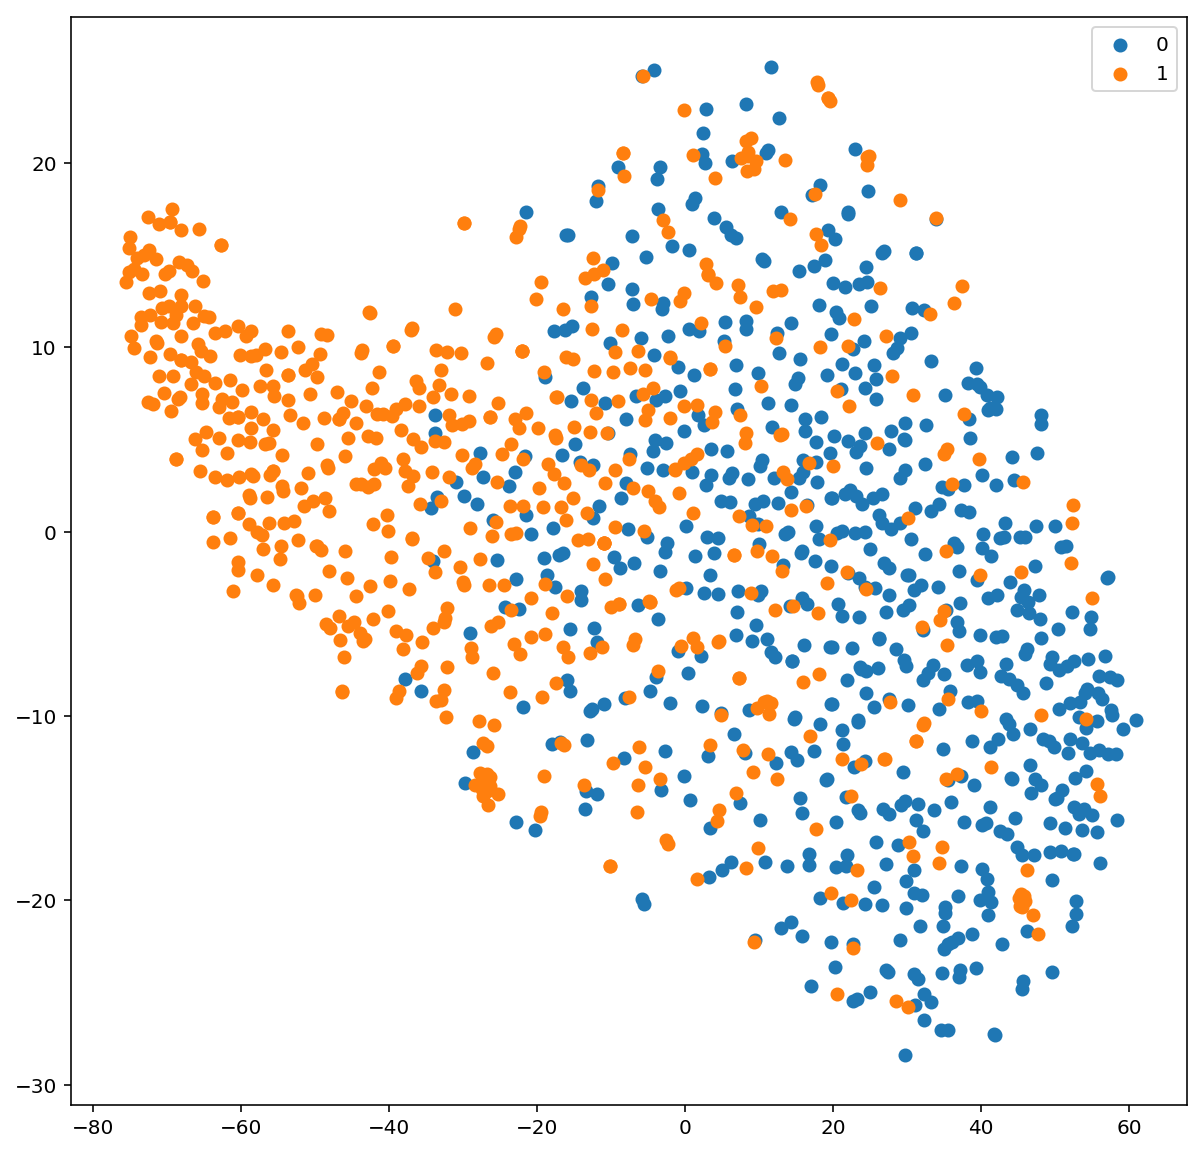

In [39]:
plt.figure(figsize=(10,10))
for cl in range(2):
    indices = np.where(color_map==cl)
    indices = indices[0]
    plt.scatter(tsne_results[indices,0], tsne_results[indices, 1], label=cl)
plt.legend()
plt.show()

In [45]:
#clustering positive data
poslabel = [1] * len(pos_seq)
postestX1,postestY = onehotkey_sec(pos_sec,poslabel)
postestX2,postestY = onehotkey(pos_seq,poslabel)
testX1,testY = onehotkey_sec(pos_sec,poslabel)
testY = np_utils.to_categorical(testY,2)
testY = testY.reshape(-1,2)
row1,col1 = testX1[0].shape
row2,col2 = testX2[0].shape
testX1.shape = (testX1.shape[0],row1,col1)
testX2.shape = (testX2.shape[0],row2,col2)
pos_hidden_features = trunc_cnn.predict([testX1,testX2])


Text(0.5, 1.0, 'hiddenlayer dendrogram')

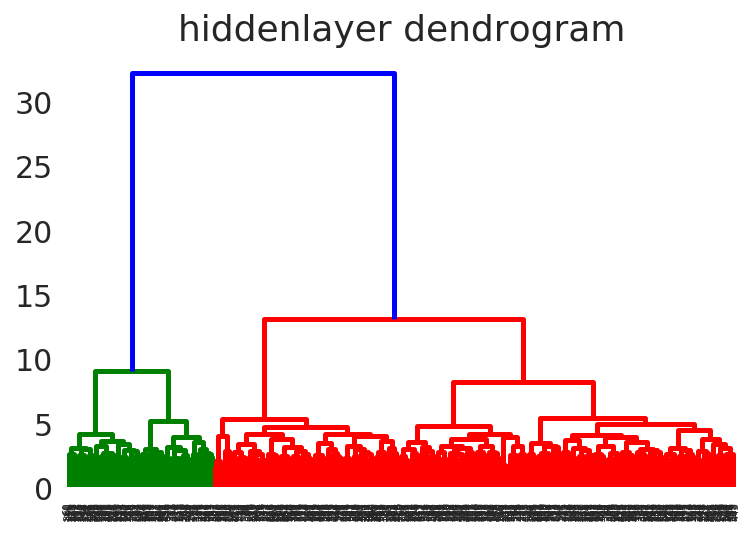

In [52]:
import scipy.cluster.hierarchy as shc
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
mms = MinMaxScaler()
mms.fit(pos_hidden_features)
data_transformed = mms.transform(pos_hidden_features)
dend = shc.dendrogram(shc.linkage(data_transformed, method='ward'))
plt.title('hiddenlayer dendrogram')

Text(0.5, 1.0, 'Elbow Method For Optimal k')

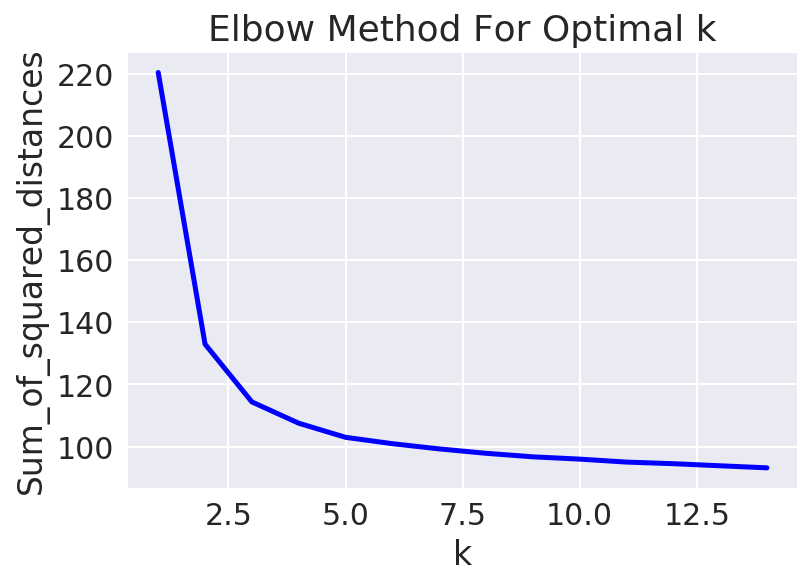

In [54]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
   km = KMeans(n_clusters=k)
   km = km.fit(pos_hidden_features)
   Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')

In [55]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data_transformed)
cluster_labels = []
for i in kmeans.labels_:
    cluster_labels.append(int(i))

import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123


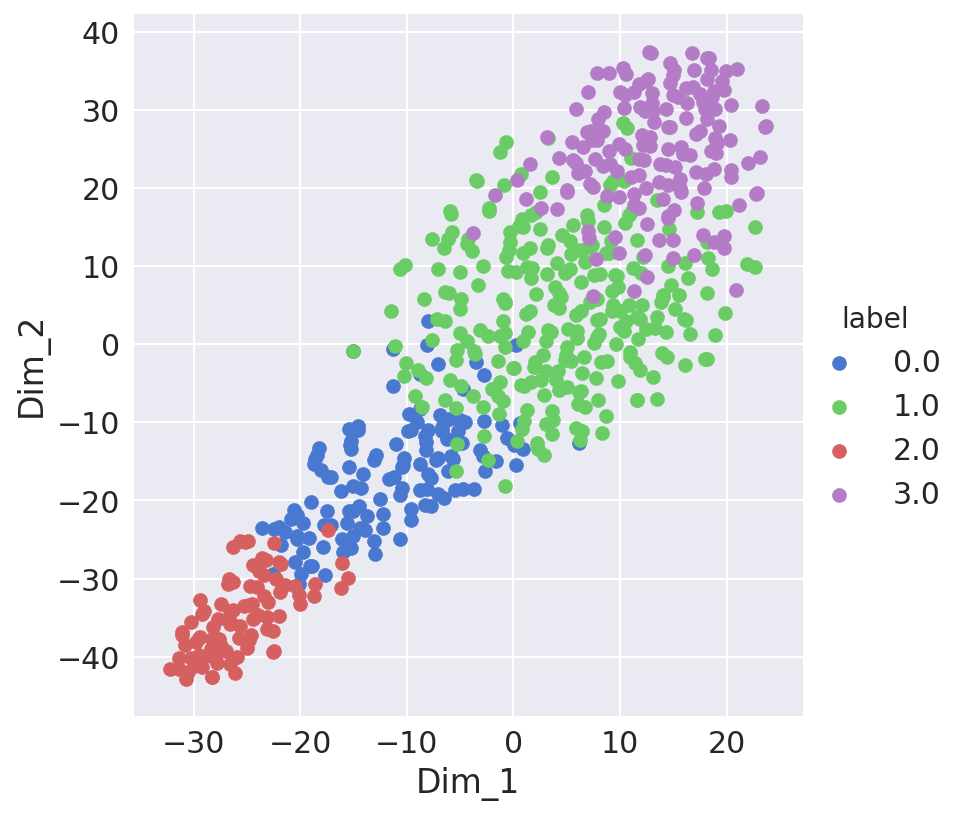

In [56]:
model = TSNE(n_components = 2,random_state =0)
tsne_data = model.fit_transform(pos_hidden_features)
tsne_data = np.vstack((tsne_data.T,kmeans.labels_)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("Dim_1","Dim_2","label"))
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'Dim_1','Dim_2').add_legend()